## Primeiro Modelo

O primeiro modelo foi baseado neste exemplo: [Treine sua primeira rede neural
](https://www.tensorflow.org/tutorials/keras/classification).

In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

print(tf.__version__)

2.4.1


In [2]:
# Diretórios 
model_path = '../models/'
data_path = '../data/processed/'

In [3]:
# Carregando os dados
train_images = np.load(data_path+"train_images.npy")
train_labels = np.load(data_path+"train_labels.npy")
test_images = np.load(data_path+"test_images.npy")
test_labels = np.load(data_path+"test_labels.npy")

In [4]:
# Normalizando os dados
train_images = train_images / 255.0

test_images = test_images / 255.0

In [5]:
# Criando o modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [6]:
# Compilando o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Treinando o modelo
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4404 - accuracy: 0.8737
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1152 - accuracy: 0.9656
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0756 - accuracy: 0.9780
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0574 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0421 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0312 - accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0273 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0207 - accuracy: 0.9938
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0179 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.013

In [8]:
# Testando o modelo
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0814 - accuracy: 0.9772

Test accuracy: 0.9771999716758728


In [9]:
# Salvando o modelo
model_name = 'keras01'
model.save(model_path+ f'{model_name}')

INFO:tensorflow:Assets written to: ../models/keras01/assets


In [10]:
# Carregando o modelo
model = keras.models.load_model(model_path+ f'{model_name}')

In [11]:
# Testando o modelo carregado
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0814 - accuracy: 0.9772

Test accuracy: 0.9771999716758728


In [12]:
# Matriz de confusão
predictions = model.predict(test_images)
predictions = np.argmax(predictions,axis=1)
cm = tf.math.confusion_matrix(labels=test_labels, predictions=predictions)


Text(69.0, 0.5, 'Truth')

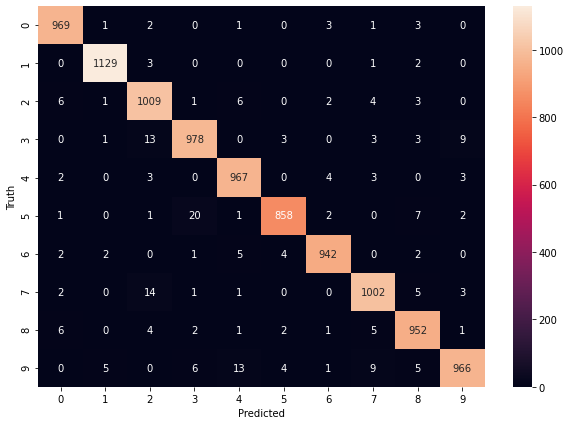

In [13]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')